In [7]:
import sklearn
from sklearn import tree, datasets, metrics
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import graphviz
import csv
from matplotlib.colors import ListedColormap
%pylab inline
from matplotlib import pyplot as plt

df = pd.read_csv(r'~/large_dataset.csv', names=['PC address', 'Target address', 'Taken/Not taken'])
print(df)

# Чтение данных"

results = []
with open("~/large_dataset.csv") as csvfile:
    reader = csv.reader(csvfile, delimiter=',',quoting=csv.QUOTE_NONE)
    for row in reader:
        results.append(row)
 
# подготовка данных
data = [x[:2] for x in results]
target = [x[2:] for x in results]

data_1 = [x[:1] for x in results]
data_2 = [x[1:2] for x in results]
target_2 = [x[2:] for x in results]

data_1 = [[int(x) for x in sublist] for sublist in data_1]
data_2 = [[int(x) for x in sublist] for sublist in data_2]
target_2 = [[int(x) for x in sublist] for sublist in target]

data_1, data_2, target_2

# обучение деревьев

classification_tree_estimator = DecisionTreeClassifier(splitter='best', max_depth=7, random_state=66)

classification_tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=66)

classification_tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=10)

classification_tree_estimator = classification_tree_estimator.fit(data, target)

classification_tree_gini = classification_tree_gini.fit(data, target)

classification_tree_entropy = classification_tree_entropy.fit(data, target)

graph_estimate = graphviz.Source(tree.export_graphviz(classification_tree_estimator, out_file=None,  
                     filled=True, rounded=True,  
                     special_characters=True,impurity= False,precision=5)) 

graph_gini = graphviz.Source(tree.export_graphviz(classification_tree_gini, out_file=None,  
                     filled=True, rounded=True,  
                     special_characters=True,impurity=False, precision=5)) 

graph_entropy = graphviz.Source(tree.export_graphviz(classification_tree_entropy, out_file=None,  
                     filled=True, rounded=True,  
                     special_characters=True,impurity=True))

Populating the interactive namespace from numpy and matplotlib
    PC address  Target address  Taken/Not taken
0        65656           65660                0
1        65660           65664                0
2        65664           65668                0
3        65668           65672                0
4        65672           65676                0
5        65672           65676                0
6        65676           65680                0
7        65664           65668                0
8        65668           65672                0
9        65672           65664                1
10       65672           65664                1
11       65664           65668                0
12       65668           65672                0
13       65672           65664                1
14       65672           65664                1
15       65664           65668                0
16       65668           65672                0
17       65672           65664                1
18       65672           

estimate


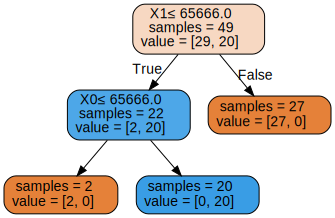

In [2]:
print ("estimate")
graph_estimate

Граф по критерию неопределенности Джини


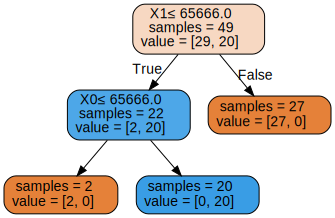

In [3]:
print("Граф по критерию неопределенности Джини")
graph_gini

entropy


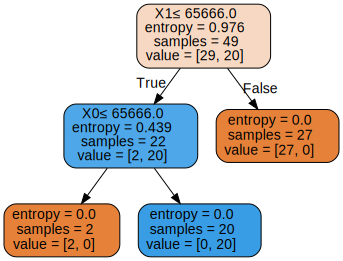

In [4]:
print("entropy")
graph_entropy

Accuracy:
1.0


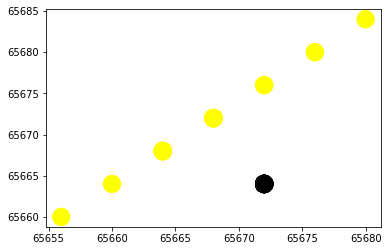

In [5]:
train_data, test_data, train_labels, test_labels = sklearn.model_selection.train_test_split(data, target,
                                                                   test_size=None, random_state=3)

classification_tree = DecisionTreeClassifier(random_state=10).fit(train_data, train_labels)
predictions = classification_tree.predict(test_data)
accuracy = metrics.accuracy_score(test_labels, predictions)

print("Accuracy:")
print(accuracy)

colors = ListedColormap(['yellow','blue','black'])

pylab.scatter(list(map(lambda x: x[0], data_1)), list(map(lambda x: x[0], data_2)), 
            c=target, cmap=colors, s=300)